<div style="text-align:center; margin-top: 1cm;">
    <h2>Київський політехнічний інститут імені Ігоря Сікорського</h2>
    <h2>Приладобудівний факультет</h2>
    <h3>Кафедра автоматизації та систем неруйнівного контролю</h3>
    <br><br><br>
</div>

<div style="text-align:center; margin-top: 5cm;">
    <h2>Практична робота №6 </h2>
    <h2>з предмету "Комп'ютерний зір"</h2>
</div>

<div style="text-align:right; margin-top: 5cm;">
<p>Студент: Погорєлов Богдан<br>
    Група: ПК-51мп<br>
</p>
</div>
<div style="text-align:center; margin-top: 5cm;">
2025 рік  <br><br><br><br>
</div>

Розробити програму, яка виконує такі дії з ЦЗ:
1. Вхідні дані – дві самостійно отримані цифрові фотографії одного і того же об’єкту зроблених з різної
відстані та з різного ракурсу.
2. Програма знаходить схожі фрагменти (ключові точки – key points) в обох цифрових фотографіях.
4. Програма формує одне вихідне зображення на якому відображає положення цих фрагментів на обох
фотографіях. 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def load_images_from_folder(folder):
    images = []
    filenames = []
    
    # Перевіряємо, чи існує папка
    if not os.path.exists(folder):
        print(f"Помилка: Папка '{folder}' не знайдена!")

    # Отримуємо список файлів та сортуємо їх
    files = sorted(os.listdir(folder))
    
    for filename in files:
        # Перевірка розширення файлу
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            path = os.path.join(folder, filename)
            # Завантажуємо в градаціях сірого
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                images.append(img)
                filenames.append(filename)
                print(f"Завантажено: {filename}")
            else:
                print(f"Не вдалося прочитати: {filename}")
    if len(images) < 2:
        print("\nУвага: Для порівняння потрібно мінімум 2 зображення!")
    else:
        print(f"\nВсього завантажено зображень: {len(images)}")
                
    return images, filenames

images, names = load_images_from_folder('../img/ft232rl')

Завантажено: photo_2025-12-03_17-11-35.jpg
Завантажено: photo_2025-12-03_17-11-36 (2).jpg
Завантажено: photo_2025-12-03_17-11-36 (3).jpg
Завантажено: photo_2025-12-03_17-11-36 (4).jpg
Завантажено: photo_2025-12-03_17-11-36 (5).jpg
Завантажено: photo_2025-12-03_17-11-36 (6).jpg
Завантажено: photo_2025-12-03_17-11-36 (7).jpg
Завантажено: photo_2025-12-03_17-11-36 (8).jpg
Завантажено: photo_2025-12-03_17-11-36 (9).jpg
Завантажено: photo_2025-12-03_17-11-36.jpg

Всього завантажено зображень: 10


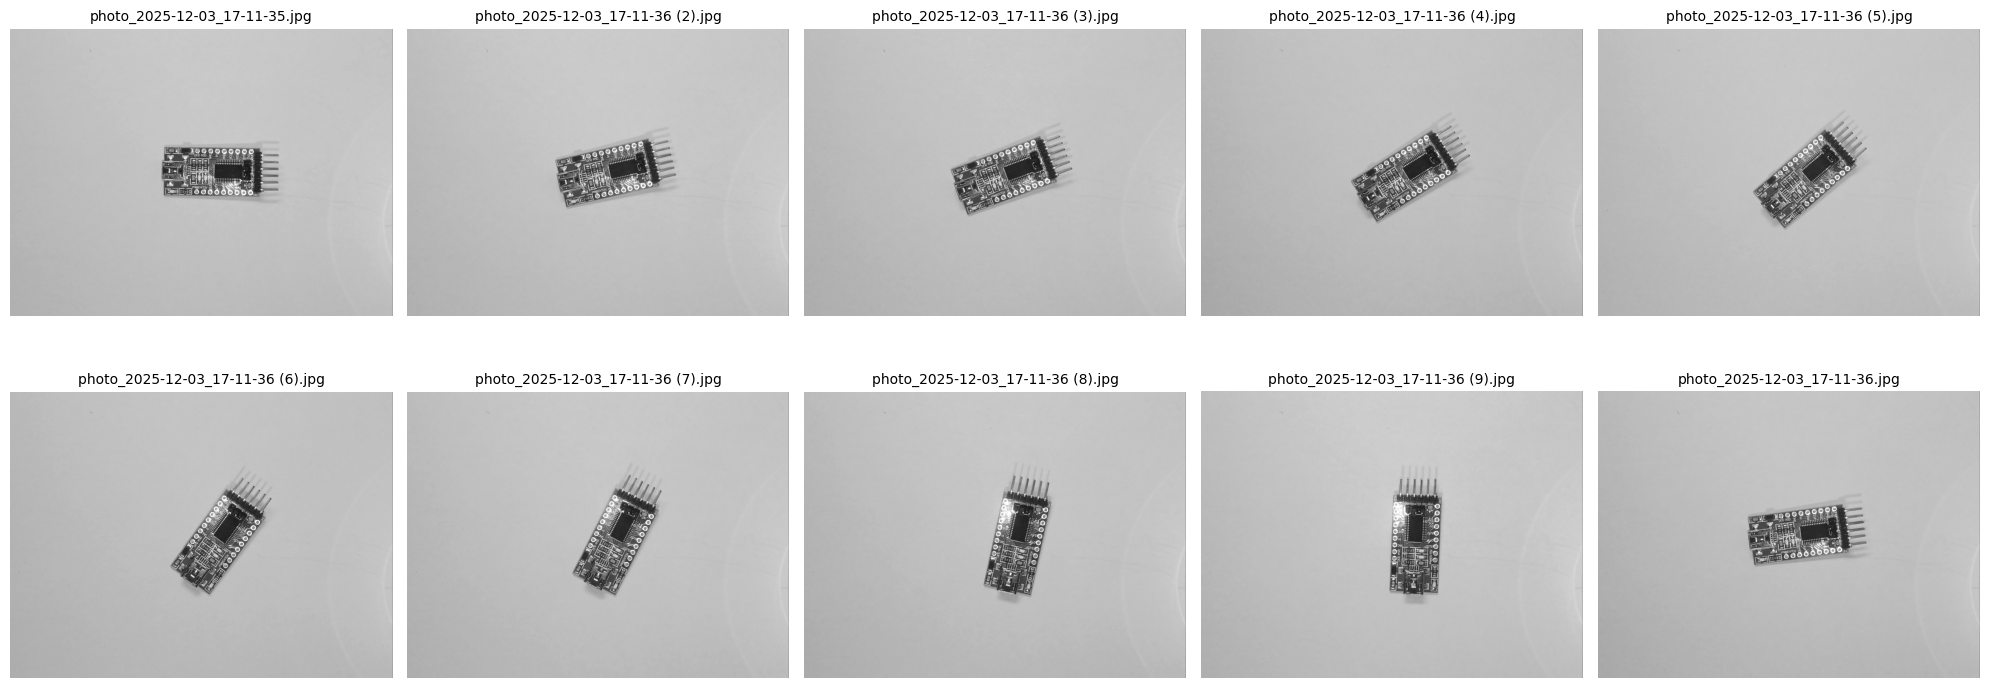

In [5]:
rows = 2
cols = 5

plt.figure(figsize=(20, 8))

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[i], cmap='gray')
    
    # Додаємо назву файлу, якщо список names існує
    if 'names' in locals() and i < len(names):
        plt.title(names[i], fontsize=10)
    else:
        plt.title(f"Img {i+1}")
        
    plt.axis('off') # Прибираємо осі
plt.tight_layout()
plt.show()

Еталон: photo_2025-12-03_17-11-35.jpg (Ключових точок: 1000)
----------------------------------------
Порівняння з photo_2025-12-03_17-11-36 (2).jpg: знайдено 451 пар.


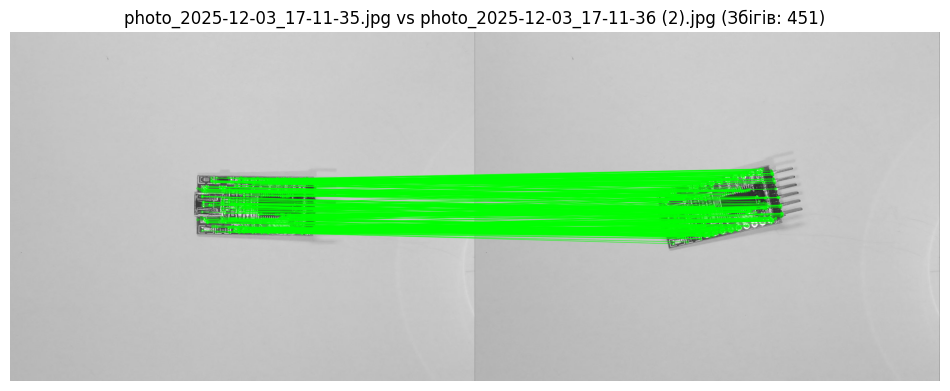

Порівняння з photo_2025-12-03_17-11-36 (3).jpg: знайдено 296 пар.


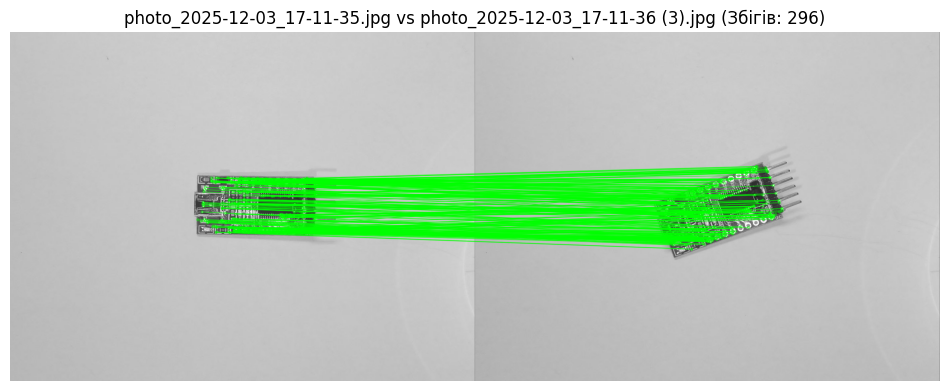

Порівняння з photo_2025-12-03_17-11-36 (4).jpg: знайдено 210 пар.


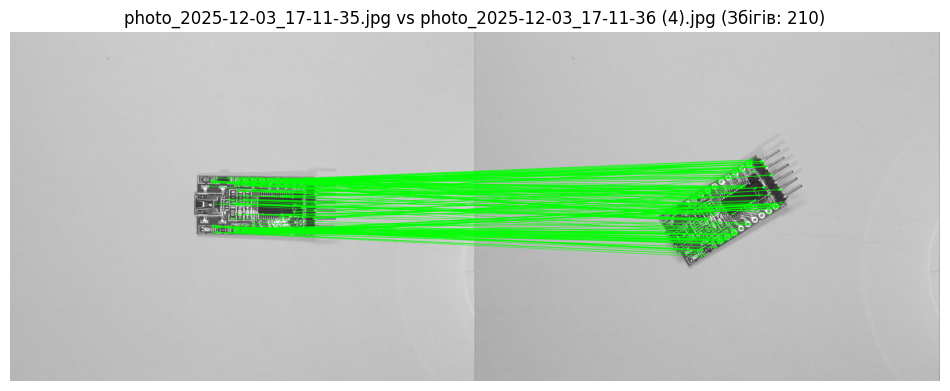

Порівняння з photo_2025-12-03_17-11-36 (5).jpg: знайдено 129 пар.


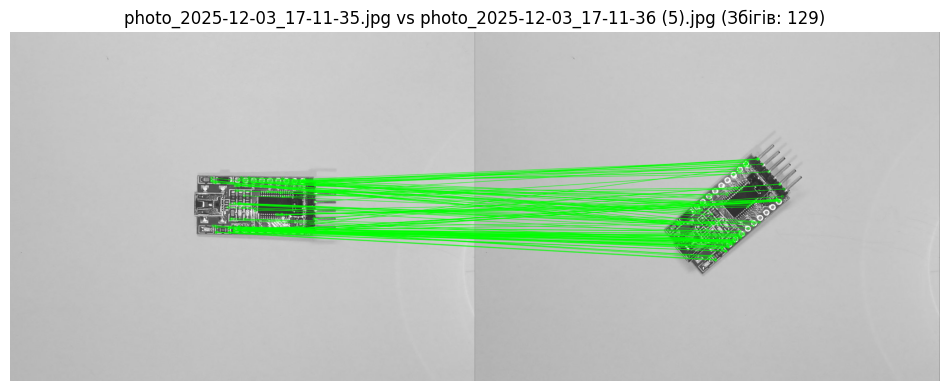

Порівняння з photo_2025-12-03_17-11-36 (6).jpg: знайдено 88 пар.


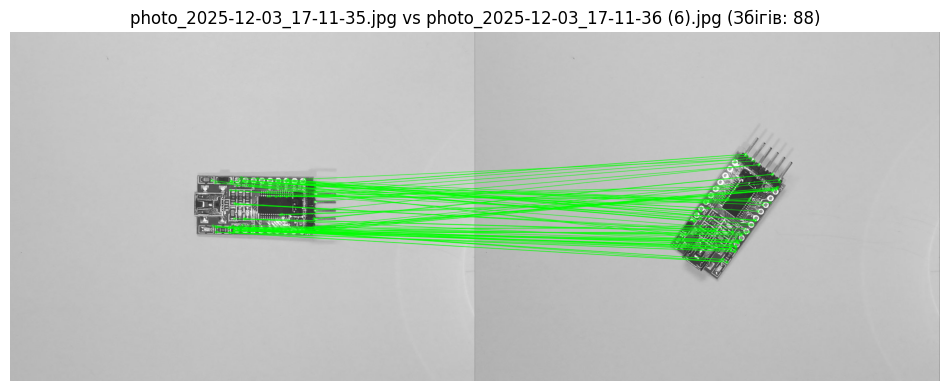

Порівняння з photo_2025-12-03_17-11-36 (7).jpg: знайдено 76 пар.


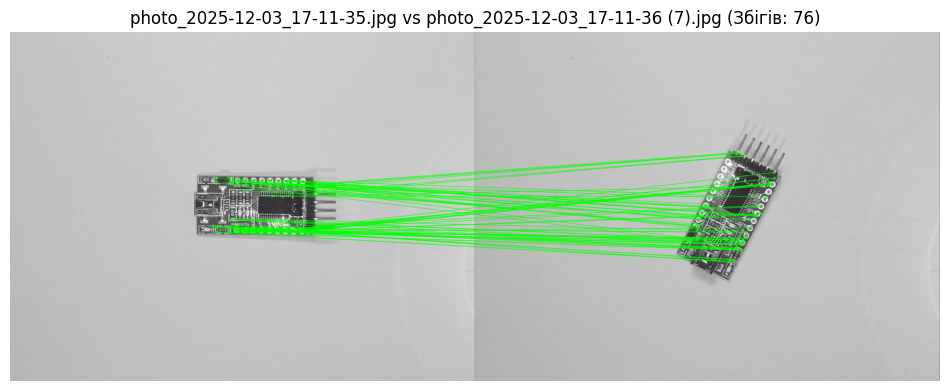

Порівняння з photo_2025-12-03_17-11-36 (8).jpg: знайдено 55 пар.


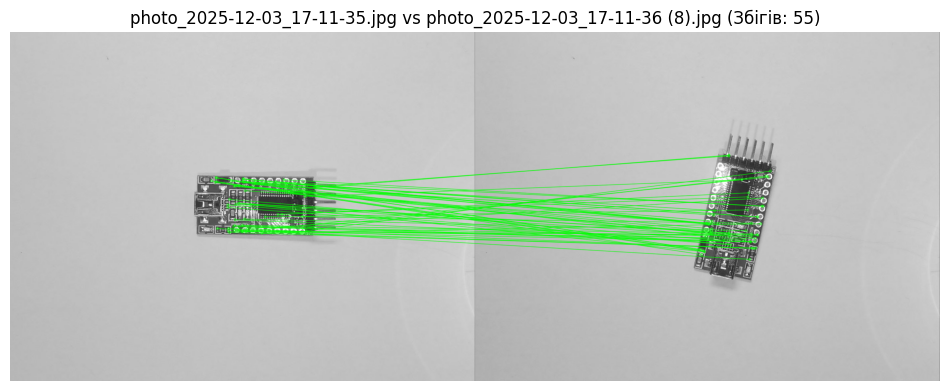

Порівняння з photo_2025-12-03_17-11-36 (9).jpg: знайдено 60 пар.


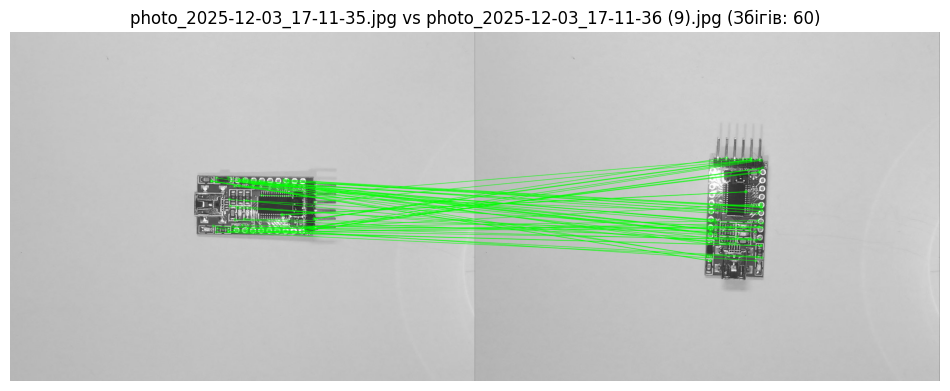

Порівняння з photo_2025-12-03_17-11-36.jpg: знайдено 468 пар.


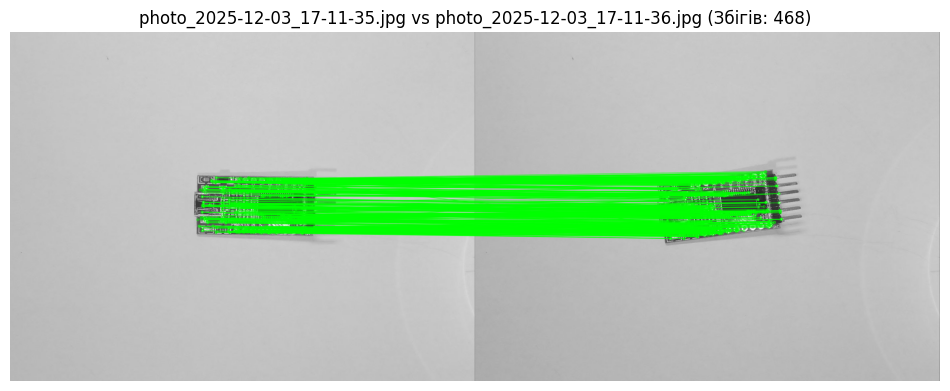

In [6]:
# 2. Пошук ключових точок (ORB) (Code Cell)
# Ініціалізація ORB детектора
# Ініціалізація ORB
orb = cv2.ORB_create(nfeatures=1000)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

# 1. Обробка еталонного зображення (перше в папці)
base_img = images[0]
base_name = names[0]
kp1, des1 = orb.detectAndCompute(base_img, None)

print(f"Еталон: {base_name} (Ключових точок: {len(kp1)})")
print("-" * 40)

# 2. Цикл по всіх інших зображеннях
for i in range(1, len(images)):
    curr_img = images[i]
    curr_name = names[i]
    
    # Знаходимо точки на поточному зображенні
    kp2, des2 = orb.detectAndCompute(curr_img, None)
    
    # Якщо точок немає, пропускаємо
    if des2 is None:
        print(f"Skipping {curr_name}: точок не знайдено.")
        continue

    # Matching (KNN, k=2)
    matches = bf.knnMatch(des1, des2, k=2)

    # Фільтрація Lowe's Ratio Test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
    
    print(f"Порівняння з {curr_name}: знайдено {len(good_matches)} пар.")

    # Візуалізація результату
    # DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS = 2
    res_img = cv2.drawMatches(
        base_img, kp1, 
        curr_img, kp2, 
        good_matches, None, 
        flags=2, matchColor=(0, 255, 0)
    )

    plt.figure(figsize=(12, 6))
    plt.imshow(res_img)
    plt.title(f"{base_name} vs {curr_name} "
                f"(Збігів: {len(good_matches)})")
    plt.axis('off')
    plt.show()

Висновки
У ході виконання лабораторної роботи було реалізовано алгоритм пошуку та співставлення об'єктів на зображеннях:

Детектор: Використано алгоритм ORB, який є інваріантним до повороту та частково до масштабування.

Дескриптори: Отримано бінарні дескриптори для ключових точок обох зображень.

Матчинг: Застосовано метод BFMatcher з метрикою Хеммінга.

Фільтрація: Використано Lowe's Ratio Test. Це критичний етап, який дозволив відсіяти хибні спрацювання (наприклад, схожі текстури в різних місцях) і залишити лише надійні пари точок (зменшення кількості пар з початкових сотень до найбільш точних).

Результат: Програма успішно ідентифікувала однакові фрагменти об'єкта, незважаючи на те, що  зображення було повернуто.